# Импортируем необходимые библиотеки

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 53.7 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow import keras
import rdkit
import torch

# Проверяем версии для уверенности в правильности установки
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("RDKit version:", rdkit.__version__)
print("PyTotch version:", torch.__version__)

TensorFlow version: 2.17.1
Keras version: 3.5.0
RDKit version: 2024.03.6
PyTotch version: 2.5.1+cu121


In [3]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [4]:
#импортируем методы RDKit
import warnings

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator, rdMolDescriptors
from rdkit import DataStructs
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect

pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

# Импортируем данные

,Unnamed: 0,Name,Smiles,Ka_mean,mol
0,0,cyclododecylammonium,[NH3+]C1CCCCCCCCCCC1,52000.0,
1,1,"4-(1,1-dimethylpiperidin-1-ium-4-yl)-1,1-dimet...",C[N+]1(C)CCC(CC1)C1CC[N+](C)(C)CC1,45000000.0,
2,2,norbornan-2-ylammonium,[NH3+]C1CC2CCC1C2,640000.0,
3,3,trimethylsilylmethylammonium,C[Si](C)(C)C[NH3+],500000.0,
4,4,"[3,5-dimethyl-7-(trimethylammonio)-1-adamantyl...",CC12CC3(C)CC(C1)(CC(C2)(C3)[N+](C)(C)C)[N+](C)...,9200.0,
5,5,cyclooctylammonium,[NH3+]C1CCCCCCC1,720000.0,
6,6,cyclohexylammonium,[NH3+]C1CCCCC1,130000.0,
7,7,3-[benzyl(dimethyl)ammonio]propane-1-sulfonate,C[N+](C)(CCCS([O-])(=O)=O)CC1=CC=CC=C1,23300.0,
8,8,(3-hydroxy-1-adamantyl)ammonium,[NH3+]C12CC3CC(C1)CC(O)(C3)C2,37000.0,
9,9,trimethyl-[[4-[(trimethylammonio)methyl]phenyl...,C[N+](C)(C)CC1=CC=C(C[N+](C)(C)C)C=C1,16000000.0,

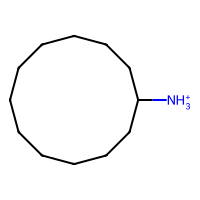
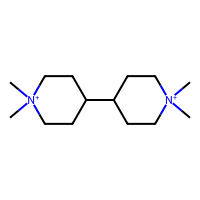
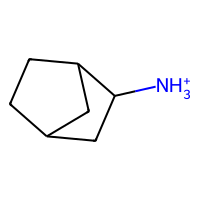
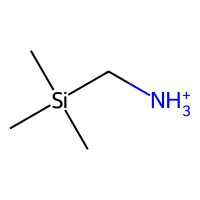
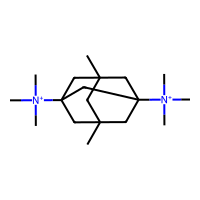
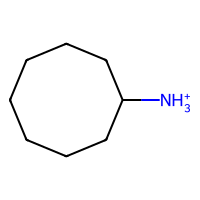
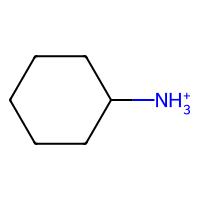
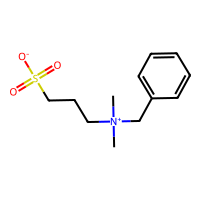
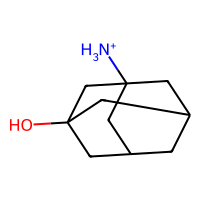
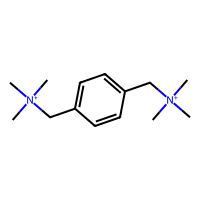
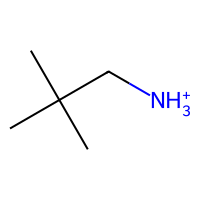
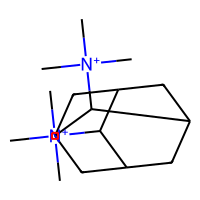
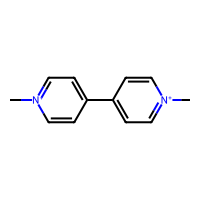
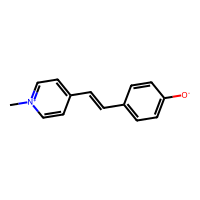
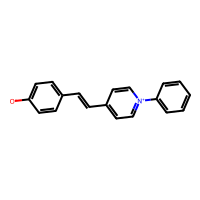
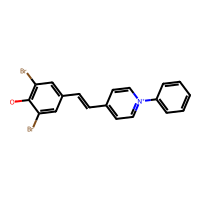
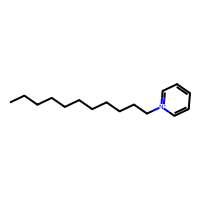
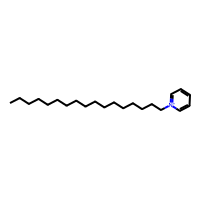
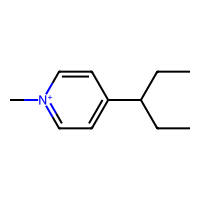
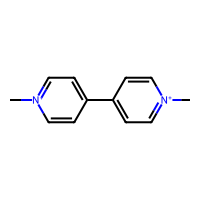
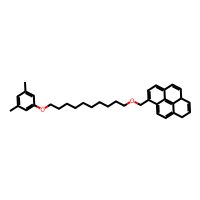
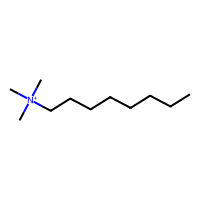
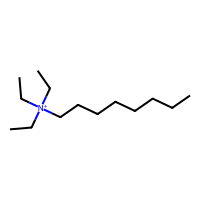
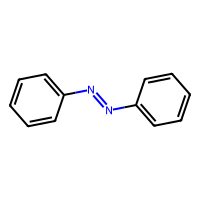
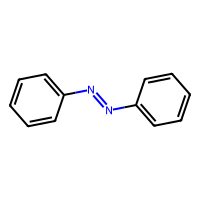
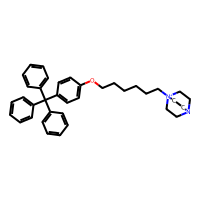
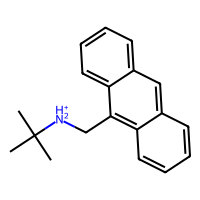
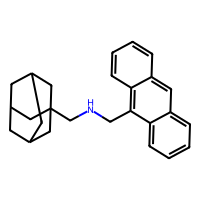
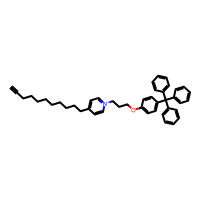
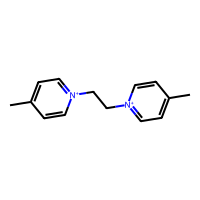
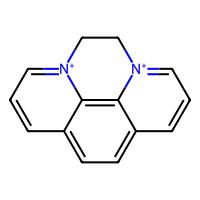
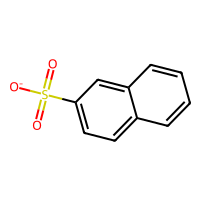
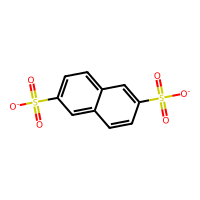

In [5]:
FULL_df = pd.read_csv("GuestsWP++.csv")
FULL_df = FULL_df.drop(["mol"], axis = 1)
PandasTools.AddMoleculeColumnToFrame(FULL_df, 'Smiles', 'mol')
FULL_df

# Дескрипторы

### Создание

In [6]:
from rdkit.Chem import Descriptors
prop = [Descriptors.CalcMolDescriptors(mol) for mol in FULL_df["mol"]]
df_prop = pd.DataFrame(prop)
df = pd.concat([FULL_df, df_prop], axis = 1).drop(["Name", "mol", "Smiles", "Unnamed: 0"], axis = 1)
df.sample(3)

,Ka_mean,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
4,9200.0,2.594792,2.594792,0.503750,0.503750,0.681127,51.6000,280.500,244.212,280.286752,...,0,0,0,0,0,0,0,0,0,0
13,124000.0,10.906542,10.906542,0.045265,0.045265,0.695197,10.8125,211.264,198.160,211.099714,...,0,0,0,0,0,0,0,0,0,0
8,37000.0,10.227708,10.227708,0.262731,-0.299769,0.537166,62.5000,168.260,150.116,168.138291,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#количество дескрипторов
len(list(df.columns)) - 1

210

### Анализ кореллирующих дескрипторов (основного датасета)

In [8]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [9]:
from catboost import CatBoostRegressor

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(["Ka_mean"], axis = 1)
Y = df["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
cb = CatBoostRegressor()
cb.fit(X_train, y_train, verbose=0)

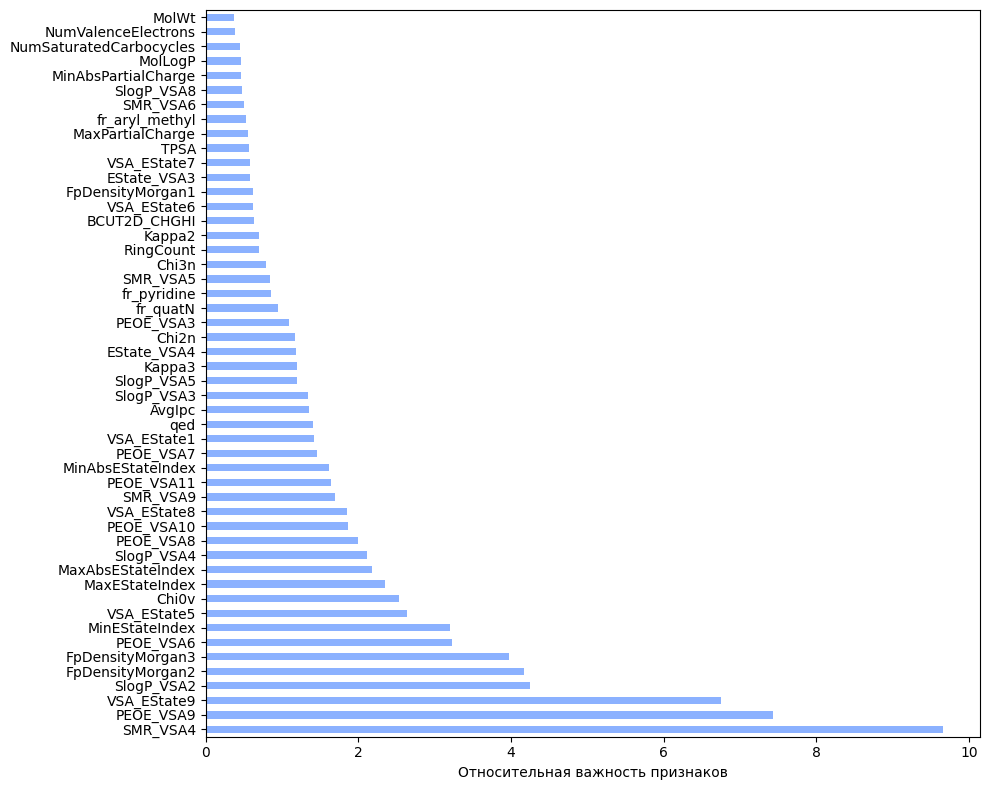

In [13]:
y_pred = cb.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_importances = pd.Series(cb.get_feature_importance(), index=X.columns)
feat_importances.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность признаков')
plt.tight_layout()

In [14]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_importances
})

# Сортируем DataFrame по важности и берем топ-10 признаков
top_features_desc = importance_df.sort_values(by='Importance', ascending=False).head(10)

### Топ-10 важных дескрипторов

In [15]:
top_features_desc

,Feature,Importance
SMR_VSA4,SMR_VSA4,9.663556
PEOE_VSA9,PEOE_VSA9,7.432803
VSA_EState9,VSA_EState9,6.758898
SlogP_VSA2,SlogP_VSA2,4.248973
FpDensityMorgan2,FpDensityMorgan2,4.170781
FpDensityMorgan3,FpDensityMorgan3,3.970548
PEOE_VSA6,PEOE_VSA6,3.222994
MinEStateIndex,MinEStateIndex,3.204194
VSA_EState5,VSA_EState5,2.635198
Chi0v,Chi0v,2.526492


In [16]:
top_desc = list(top_features_desc["Feature"])

In [17]:
#создадим датасет только с актуальными дескрипторами
DF = df[top_desc]
DF = DF.assign(Ka_mean = df["Ka_mean"])

### Нормализация

In [24]:
DF.head(3)

,SMR_VSA4,PEOE_VSA9,VSA_EState9,SlogP_VSA2,FpDensityMorgan2,FpDensityMorgan3,PEOE_VSA6,MinEStateIndex,VSA_EState5,Chi0v,Ka_mean
0,0.000000,6.041841,0.000000,6.041841,0.846154,1.230769,44.945751,0.749469,0.000000,9.062632,52000.0
1,11.835812,54.369714,9.544009,63.335775,0.812500,1.062500,0.000000,1.047639,2.095278,11.705982,45000000.0
2,11.835812,6.041841,0.000000,6.041841,2.000000,2.250000,0.000000,0.827546,2.113426,5.267585,640000.0


In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
cols_for_nor = list(DF.columns)

#создаю трансформатор для нормализации Y
ct = make_column_transformer((MinMaxScaler(), cols_for_nor))

np.random.seed(42)

#трансформирую
ct.fit(DF[cols_for_nor])
norm = ct.transform(DF[cols_for_nor])
DF_norm = pd.DataFrame(norm, columns = cols_for_nor)
#DF_norm = DF_norm.drop(['Unnamed: 0'], axis = 1)

In [25]:
DF_norm.head(3)

,SMR_VSA4,PEOE_VSA9,VSA_EState9,SlogP_VSA2,FpDensityMorgan2,FpDensityMorgan3,PEOE_VSA6,MinEStateIndex,VSA_EState5,Chi0v,Ka_mean
0,0.0,0.111125,0.383244,0.095394,0.096990,0.243292,0.332359,0.904940,0.062805,0.189597,0.000510
1,0.5,1.000000,0.784061,1.000000,0.070652,0.123547,0.000000,0.955733,0.542489,0.307724,0.441176
2,0.5,0.111125,0.383244,0.095394,1.000000,0.968605,0.000000,0.918240,0.546644,0.020002,0.006274


# Фингерпринты (также только для WP6)

## MorganFingerprints

### Создание

In [86]:
df_mf = []

for mol in FULL_df['mol']:
  gen_morgan = rdFingerprintGenerator.GetMorganGenerator(radius = 2, fpSize = 2048)
  fp_morgan = gen_morgan.GetFingerprint(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(fp_morgan, arr)
  df_mf.append(arr)

MF = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_mf)], axis = 1)
MF.head(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000510,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.441176,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.006274,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Анализ

In [87]:
cb_morgan = CatBoostRegressor()
X = MF.drop(["Ka_mean"], axis = 1)[:]
y = MF["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_morgan.fit(X_train, y_train, verbose=0)

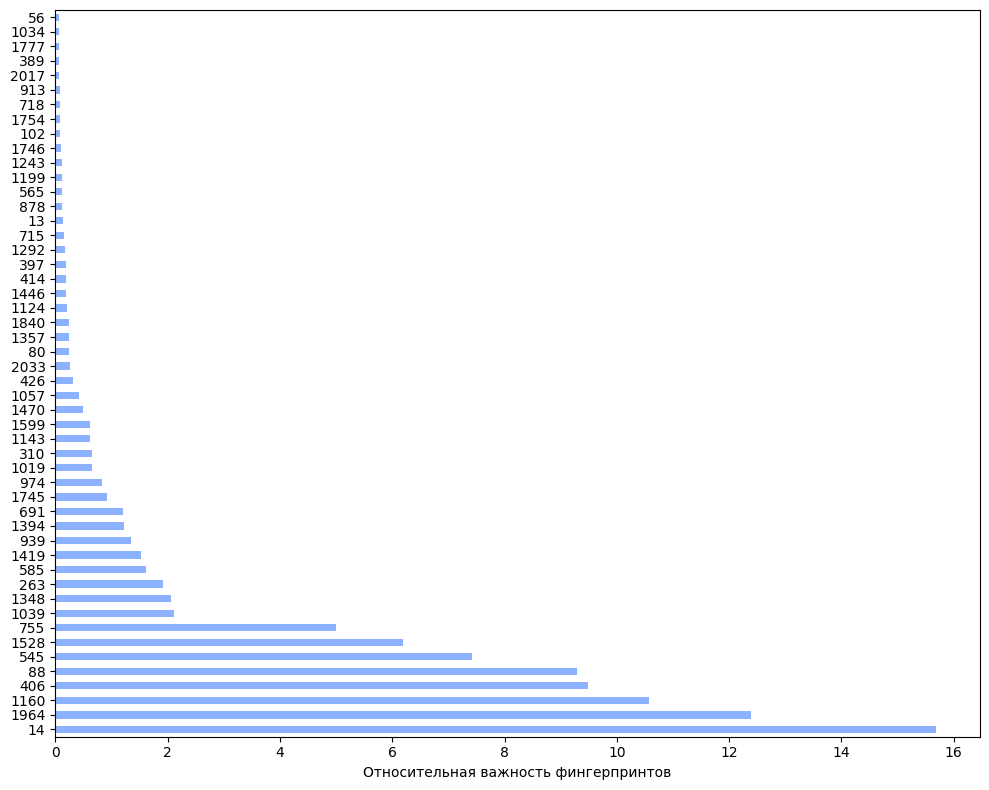

In [88]:
y_pred = cb_morgan.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_imp_morgan = pd.Series(cb_morgan.get_feature_importance(), index=X.columns)
feat_imp_morgan.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность фингерпринтов')
plt.tight_layout()

In [89]:
importance_df_morgan = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_morgan
})

# Сортируем DataFrame по важности и берем топ-15 признаков
top_features_morgan = importance_df_morgan.sort_values(by='Importance', ascending=False).head(15)
top_features_morgan

,Feature,Importance
14,14,15.682287
1964,1964,12.389115
1160,1160,10.574259
406,406,9.479636
88,88,9.284809
545,545,7.428264
1528,1528,6.192920
755,755,4.998373
1039,1039,2.123393
1348,1348,2.061385


In [90]:
top_morgan = list(top_features_morgan["Feature"])

### Удаление часто повторяющихся признаков

In [91]:
Morgan_data = pd.concat([MF[top_morgan], DF_norm], axis = 1)

In [92]:
Morgan_data.head(3)

,14,1964,1160,406,88,545,1528,755,1039,1348,...,PEOE_VSA9,VSA_EState9,SlogP_VSA2,FpDensityMorgan2,FpDensityMorgan3,PEOE_VSA6,MinEStateIndex,VSA_EState5,Chi0v,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.111125,0.383244,0.095394,0.096990,0.243292,0.332359,0.904940,0.062805,0.189597,0.000510
1,0,0,0,0,0,0,0,0,1,1,...,1.000000,0.784061,1.000000,0.070652,0.123547,0.000000,0.955733,0.542489,0.307724,0.441176
2,0,0,0,0,0,0,0,0,0,0,...,0.111125,0.383244,0.095394,1.000000,0.968605,0.000000,0.918240,0.546644,0.020002,0.006274


In [93]:
for col in Morgan_data.columns:
       print(f'Уникальные значения для {col}:\n{Morgan_data[col].value_counts()}\n')

Уникальные значения для 14:
14
0    31
1     2
Name: count, dtype: int64

Уникальные значения для 1964:
1964
0    31
1     2
Name: count, dtype: int64

Уникальные значения для 1160:
1160
0    31
1     2
Name: count, dtype: int64

Уникальные значения для 406:
406
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 88:
88
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 545:
545
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 1528:
1528
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 755:
755
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 1039:
1039
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 1348:
1348
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 263:
263
0    29
1     4
Name: count, dtype: int64

Уникальные значения для 585:
585
0    28
1     5
Name: count, dtype: int64

Уникальные значения для 1419:
1419
0    32
1     1
Name: count, dtype: int64

Уник

In [94]:
def analyze_repetition(dataframe):
    # Список для хранения названий столбцов с высоким процентом повторяющихся значений
    high_repetition_columns = []

    # Проходим по всем столбцам DataFrame
    for col in dataframe.columns:
        # Получение количества повторений значений
        value_counts = dataframe[col].value_counts(normalize=True)

        # Высчитываем максимальный процент повторяющегося значения
        max_percentage = value_counts.max() * 100  # Преобразуем в проценты

        # Если процент превышает 80, добавляем в список
        if max_percentage > 80:
            high_repetition_columns.append(col)

    return high_repetition_columns

In [95]:
analyze_repetition(Morgan_data)

[14,
 1964,
 1160,
 406,
 88,
 545,
 1528,
 755,
 1039,
 1348,
 263,
 585,
 1419,
 939,
 1394]

### **Готовый датасет**



> Состоит из констант связывания, дескрипторов и фингерпринтов




In [96]:
MORGAN_data = Morgan_data.drop(analyze_repetition(Morgan_data), axis = 1)
MORGAN_data.to_csv("MorganData++.csv")
MORGAN_data.head(3)

,SMR_VSA4,PEOE_VSA9,VSA_EState9,SlogP_VSA2,FpDensityMorgan2,FpDensityMorgan3,PEOE_VSA6,MinEStateIndex,VSA_EState5,Chi0v,Ka_mean
0,0.0,0.111125,0.383244,0.095394,0.096990,0.243292,0.332359,0.904940,0.062805,0.189597,0.000510
1,0.5,1.000000,0.784061,1.000000,0.070652,0.123547,0.000000,0.955733,0.542489,0.307724,0.441176
2,0.5,0.111125,0.383244,0.095394,1.000000,0.968605,0.000000,0.918240,0.546644,0.020002,0.006274


## Avalon Fingerprints

Повторим все то же самое, только для авалоновских и других фингерпринтов

### Создание

In [97]:
df_avalon = []

for mol in FULL_df['mol']:
  gen_avalon = pyAvalonTools.GetAvalonFP(mol, nBits = 2048)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(gen_avalon, arr)
  df_avalon.append(arr)

AVALON = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_avalon)], axis = 1)
AVALON.head(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000510,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.441176,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.006274,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Анализ

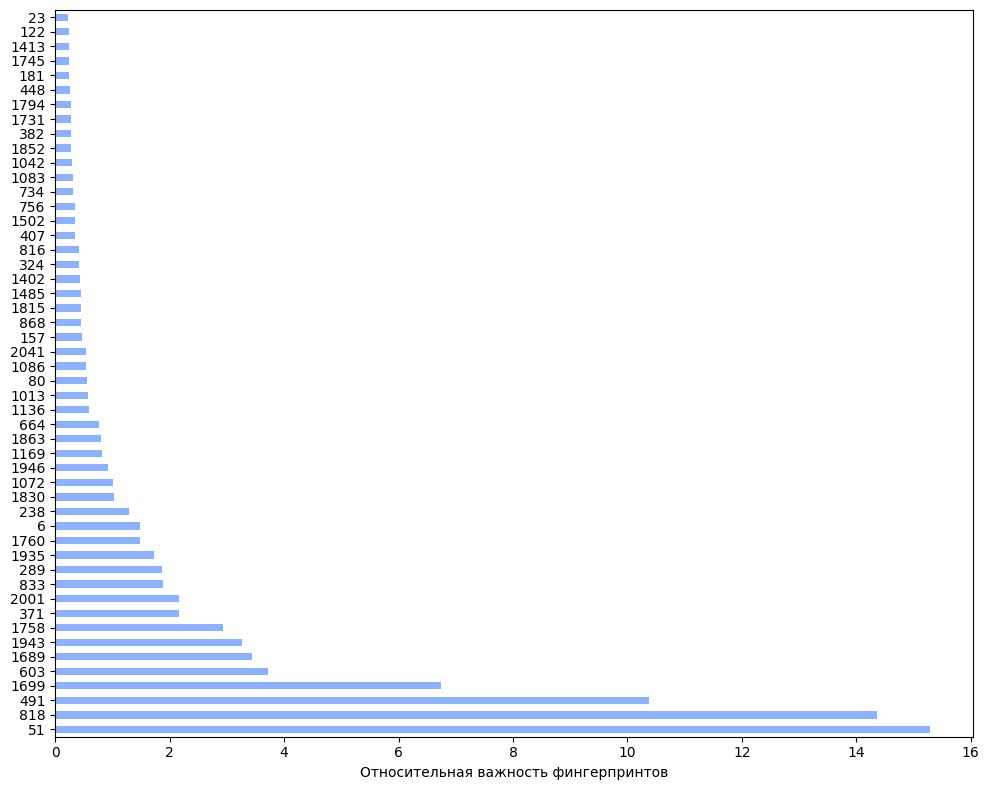

In [98]:
cb_av = CatBoostRegressor()
X = AVALON.drop(["Ka_mean"], axis = 1)[:]
y = AVALON["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_av.fit(X_train, y_train, verbose=0)

y_pred = cb_av.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_imp_avalon = pd.Series(cb_av.get_feature_importance(), index=X.columns)
feat_imp_avalon.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность фингерпринтов')
plt.tight_layout()

In [99]:
importance_df_avalon = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_avalon
})

# Сортируем DataFrame по важности и берем топ-15 признаков
top_features_avalon = importance_df_avalon.sort_values(by='Importance', ascending=False).head(15)
top_avalon = list(top_features_avalon["Feature"])
top_features_avalon

,Feature,Importance
51,51,15.284289
818,818,14.364838
491,491,10.372686
1699,1699,6.748237
603,603,3.720913
1689,1689,3.441494
1943,1943,3.259916
1758,1758,2.934468
371,371,2.159141
2001,2001,2.157032


### Удаление часто повторяющихся признаков

In [100]:
for col in Avalon_data.columns:
       print(f'Уникальные значения для {col}:\n{Avalon_data[col].value_counts()}\n')

Уникальные значения для 51:
51
0    33
Name: count, dtype: int64

Уникальные значения для 818:
818
0    33
Name: count, dtype: int64

Уникальные значения для 491:
491
0    33
Name: count, dtype: int64

Уникальные значения для 1699:
1699
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 603:
603
0    33
Name: count, dtype: int64

Уникальные значения для 1689:
1689
0    33
Name: count, dtype: int64

Уникальные значения для 1943:
1943
0    33
Name: count, dtype: int64

Уникальные значения для 1758:
1758
0    33
Name: count, dtype: int64

Уникальные значения для 371:
371
0    33
Name: count, dtype: int64

Уникальные значения для 2001:
2001
0    33
Name: count, dtype: int64

Уникальные значения для 833:
833
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 289:
289
0    33
Name: count, dtype: int64

Уникальные значения для 1935:
1935
0    33
Name: count, dtype: int64

Уникальные значения для 1760:
1760
0    33
Name: count, dtype: int64

Уникальные значения 

In [101]:
analyze_repetition(Avalon_data)

[51, 818, 491, 1699, 603, 1689, 1943, 1758, 371, 2001, 833, 289, 1935, 1760, 6]

In [102]:
AVALON_data = Avalon_data.drop(analyze_repetition(Avalon_data), axis = 1)
AVALON_data.head(3)

,SMR_VSA4,PEOE_VSA9,VSA_EState9,SlogP_VSA2,FpDensityMorgan2,FpDensityMorgan3,PEOE_VSA6,MinEStateIndex,VSA_EState5,Chi0v,Ka_mean
0,0.0,0.111125,0.383244,0.095394,0.096990,0.243292,0.332359,0.904940,0.062805,0.189597,0.000510
1,0.5,1.000000,0.784061,1.000000,0.070652,0.123547,0.000000,0.955733,0.542489,0.307724,0.441176
2,0.5,0.111125,0.383244,0.095394,1.000000,0.968605,0.000000,0.918240,0.546644,0.020002,0.006274


По факту, Авалоновские фингерпринты повторяют Моргановские: в обоих нет фингерпринтов совсем

## PatternFingerprints

### Создание

In [103]:
df_pf = []

for mol in FULL_df['mol']:
  pf = Chem.rdmolops.PatternFingerprint(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(pf, arr)
  df_pf.append(arr)

PF = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_pf)], axis = 1)
PF.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
23,0.000021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0.001216,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.000090,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


### Анализ

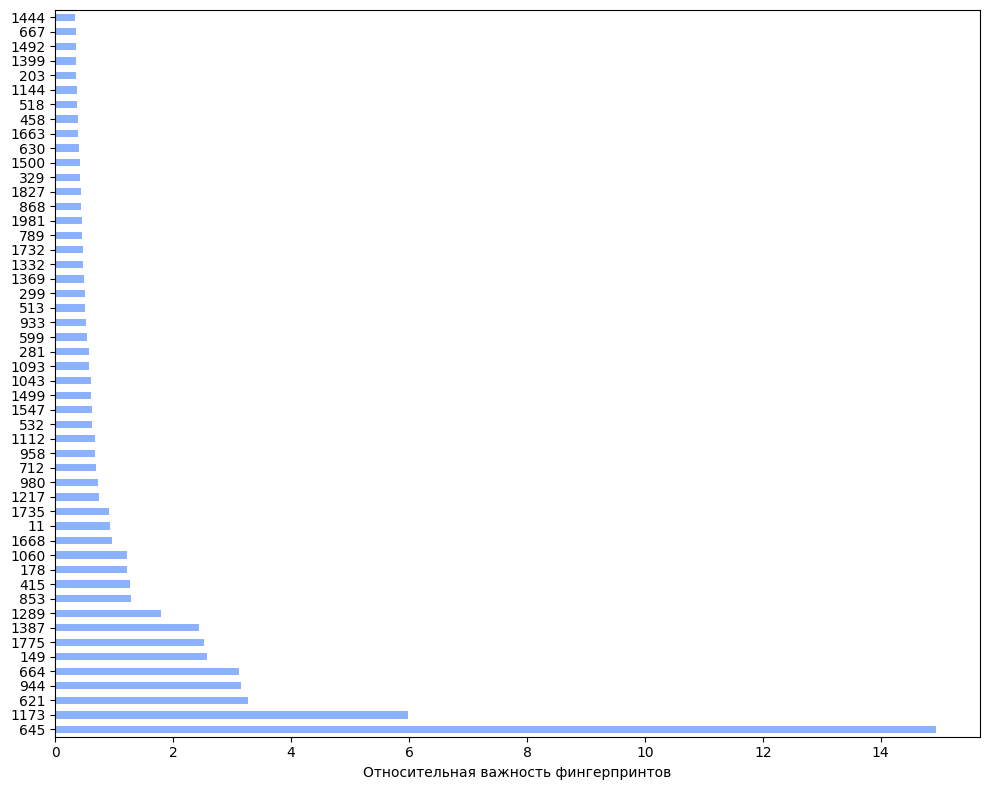

In [104]:
cb_pf = CatBoostRegressor()
X = PF.drop(["Ka_mean"], axis = 1)[:]
y = PF["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_pf.fit(X_train, y_train, verbose=0)

y_pred = cb_pf.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_imp_pattern = pd.Series(cb_pf.get_feature_importance(), index=X.columns)
feat_imp_pattern.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность фингерпринтов')
plt.tight_layout()

In [105]:
importance_df_pattern = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_pattern
})

# Сортируем DataFrame по важности и берем топ-15 признаков
top_features_pattern = importance_df_pattern.sort_values(by='Importance', ascending=False).head(15)
top_pattern = list(top_features_pattern["Feature"])
top_features_pattern

,Feature,Importance
645,645,14.936514
1173,1173,5.987305
621,621,3.264208
944,944,3.147525
664,664,3.108744
149,149,2.566847
1775,1775,2.523034
1387,1387,2.440611
1289,1289,1.795816
853,853,1.290991


### Удаление часто повторяющихся признаков

In [106]:
Pattern_data = pd.concat([MF[top_pattern], DF_norm], axis = 1)

In [107]:
Pattern_data.head(3)

,645,1173,621,944,664,149,1775,1387,1289,853,...,PEOE_VSA9,VSA_EState9,SlogP_VSA2,FpDensityMorgan2,FpDensityMorgan3,PEOE_VSA6,MinEStateIndex,VSA_EState5,Chi0v,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.111125,0.383244,0.095394,0.096990,0.243292,0.332359,0.904940,0.062805,0.189597,0.000510
1,0,0,0,0,0,0,0,0,0,0,...,1.000000,0.784061,1.000000,0.070652,0.123547,0.000000,0.955733,0.542489,0.307724,0.441176
2,0,0,0,0,0,0,0,0,0,0,...,0.111125,0.383244,0.095394,1.000000,0.968605,0.000000,0.918240,0.546644,0.020002,0.006274


In [108]:
for col in Pattern_data.columns:
       print(f'Уникальные значения для {col}:\n{Pattern_data[col].value_counts()}\n')

Уникальные значения для 645:
645
0    33
Name: count, dtype: int64

Уникальные значения для 1173:
1173
0    33
Name: count, dtype: int64

Уникальные значения для 621:
621
0    33
Name: count, dtype: int64

Уникальные значения для 944:
944
0    33
Name: count, dtype: int64

Уникальные значения для 664:
664
0    33
Name: count, dtype: int64

Уникальные значения для 149:
149
0    33
Name: count, dtype: int64

Уникальные значения для 1775:
1775
0    33
Name: count, dtype: int64

Уникальные значения для 1387:
1387
0    33
Name: count, dtype: int64

Уникальные значения для 1289:
1289
0    33
Name: count, dtype: int64

Уникальные значения для 853:
853
0    33
Name: count, dtype: int64

Уникальные значения для 415:
415
0    33
Name: count, dtype: int64

Уникальные значения для 178:
178
0    33
Name: count, dtype: int64

Уникальные значения для 1060:
1060
0    30
1     3
Name: count, dtype: int64

Уникальные значения для 1668:
1668
0    32
1     1
Name: count, dtype: int64

Уникальные значения 

In [109]:
analyze_repetition(Pattern_data)

[645,
 1173,
 621,
 944,
 664,
 149,
 1775,
 1387,
 1289,
 853,
 415,
 178,
 1060,
 1668,
 11]

In [110]:
PATTERN_data = Pattern_data.drop(analyze_repetition(Pattern_data), axis = 1)
PATTERN_data.head(3)

,SMR_VSA4,PEOE_VSA9,VSA_EState9,SlogP_VSA2,FpDensityMorgan2,FpDensityMorgan3,PEOE_VSA6,MinEStateIndex,VSA_EState5,Chi0v,Ka_mean
0,0.0,0.111125,0.383244,0.095394,0.096990,0.243292,0.332359,0.904940,0.062805,0.189597,0.000510
1,0.5,1.000000,0.784061,1.000000,0.070652,0.123547,0.000000,0.955733,0.542489,0.307724,0.441176
2,0.5,0.111125,0.383244,0.095394,1.000000,0.968605,0.000000,0.918240,0.546644,0.020002,0.006274


Судя по предыдущим 3 датасетам, если последние из топ-15 признаков фингерпринтов приближаются к нулю, то вероятнее всего фингерпринты будут удалены

## MACCS

### Создание

In [111]:
df_maccs = []

for mol in FULL_df['mol']:
  maccs = MACCSkeys.GenMACCSKeys(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(maccs, arr)
  df_maccs.append(arr)

MACCS = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_pf)], axis = 1)
MACCS.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
21,0.000012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30,0.000000,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,0.004902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Анализ

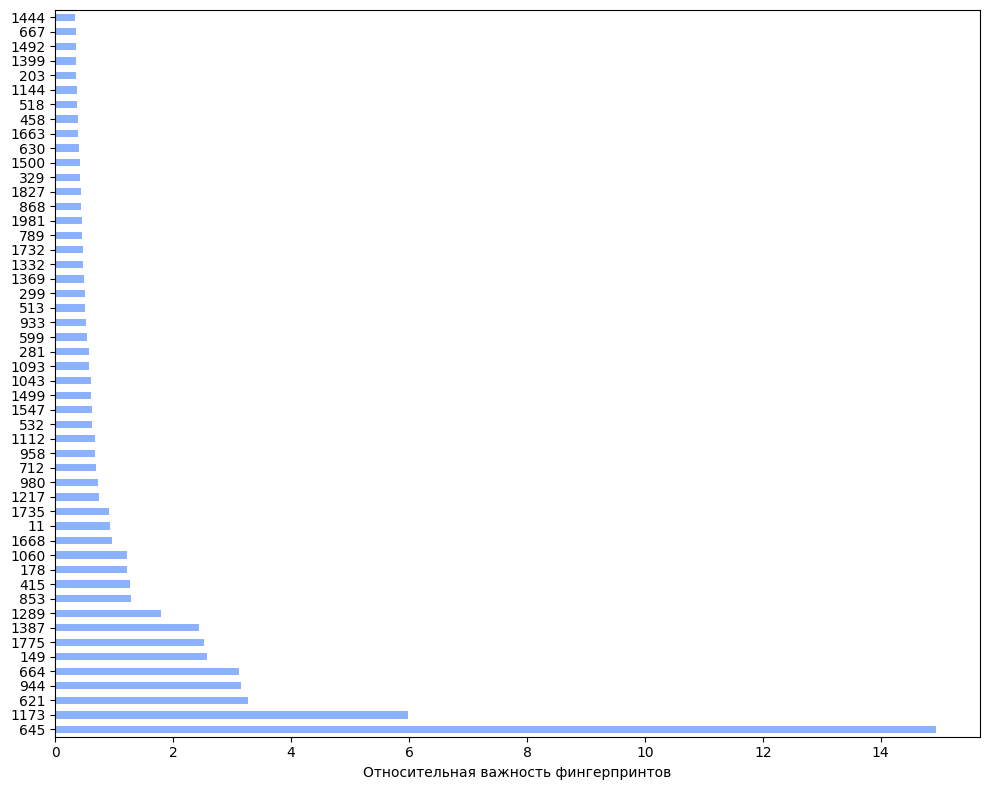

In [112]:
cb_mc = CatBoostRegressor()
X = MACCS.drop(["Ka_mean"], axis = 1)[:]
y = MACCS["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_mc.fit(X_train, y_train, verbose=0)

y_pred = cb_mc.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_imp_maccs = pd.Series(cb_mc.get_feature_importance(), index=X.columns)
feat_imp_maccs.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность фингерпринтов')
plt.tight_layout()

In [113]:
importance_df_maccs = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_maccs
})

# Сортируем DataFrame по важности и берем топ-15 признаков
top_features_maccs = importance_df_maccs.sort_values(by='Importance', ascending=False).head(15)
top_maccs = list(top_features_maccs["Feature"])
top_features_maccs

,Feature,Importance
645,645,14.936514
1173,1173,5.987305
621,621,3.264208
944,944,3.147525
664,664,3.108744
149,149,2.566847
1775,1775,2.523034
1387,1387,2.440611
1289,1289,1.795816
853,853,1.290991


Нет смысла продолжать - будут только дескрипторы, как в Моргановских

## AtomPairs Fingerprints

### Создание

In [114]:
#создадим пустой массив
df_atom = []

apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=512)
for mol in FULL_df['mol']:
  atomgen = apgen.GetFingerprint(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(atomgen, arr)
  df_atom.append(arr)

ATOMPAIRS = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_atom)], axis = 1)
ATOMPAIRS.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
29,1.960785e-08,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0
13,1.215539e-03,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,1
17,3.195932e-03,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,1,1,0,0


### Анализ

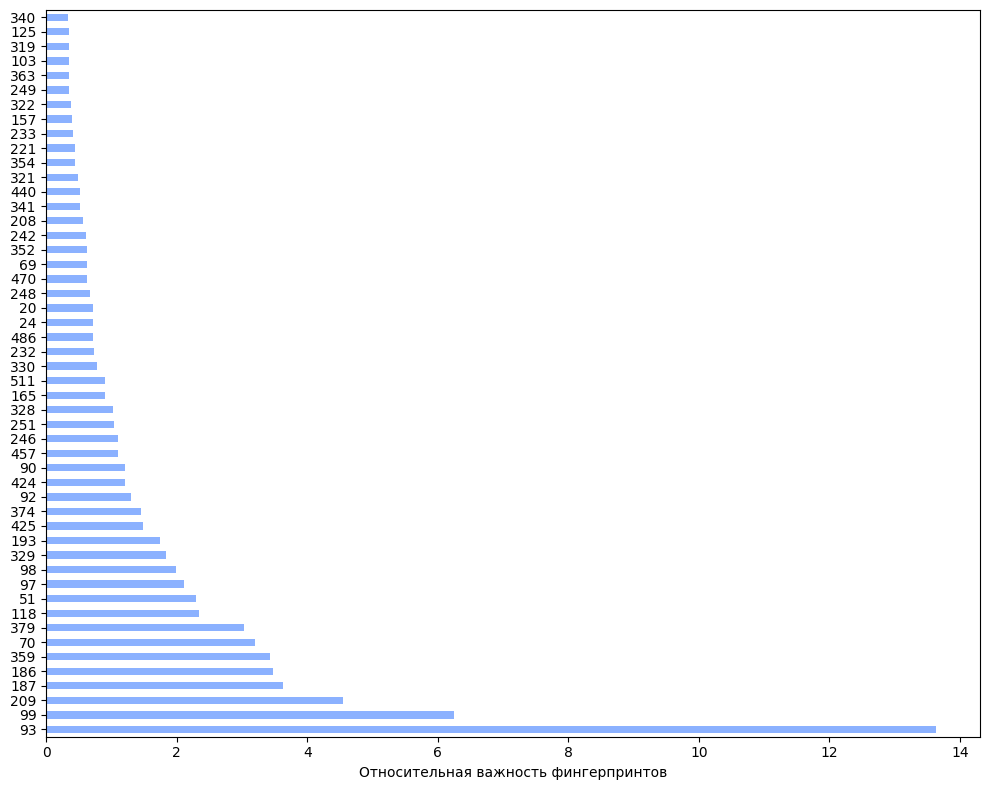

In [115]:
cb_atom = CatBoostRegressor()
X = ATOMPAIRS.drop(["Ka_mean"], axis = 1)[:]
y = ATOMPAIRS["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_atom.fit(X_train, y_train, verbose=0)

y_pred = cb_atom.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_imp_atompairs = pd.Series(cb_atom.get_feature_importance(), index=X.columns)
feat_imp_atompairs.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность фингерпринтов')
plt.tight_layout()

In [116]:
importance_df_atompairs = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_atompairs
})

# Сортируем DataFrame по важности и берем топ-15 признаков
top_features_atompairs = importance_df_atompairs.sort_values(by='Importance', ascending=False).head(15)
top_atompairs = list(top_features_atompairs["Feature"])
top_features_atompairs

,Feature,Importance
93,93,13.626470
99,99,6.245395
209,209,4.550216
187,187,3.630460
186,186,3.467126
359,359,3.427798
70,70,3.203779
379,379,3.031281
118,118,2.346644
51,51,2.287758


### Удаление часто повторяющихся признаков

In [117]:
AtomPairs_data = pd.concat([ATOMPAIRS[top_atompairs], DF_norm], axis = 1)
AtomPairs_data.head(3)

,93,99,209,187,186,359,70,379,118,51,...,PEOE_VSA9,VSA_EState9,SlogP_VSA2,FpDensityMorgan2,FpDensityMorgan3,PEOE_VSA6,MinEStateIndex,VSA_EState5,Chi0v,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.111125,0.383244,0.095394,0.096990,0.243292,0.332359,0.904940,0.062805,0.189597,0.000510
1,1,0,0,0,0,0,0,0,0,1,...,1.000000,0.784061,1.000000,0.070652,0.123547,0.000000,0.955733,0.542489,0.307724,0.441176
2,0,0,0,0,0,0,0,0,0,0,...,0.111125,0.383244,0.095394,1.000000,0.968605,0.000000,0.918240,0.546644,0.020002,0.006274


In [118]:
for col in AtomPairs_data.columns:
       print(f'Уникальные значения для {col}:\n{AtomPairs_data[col].value_counts()}\n')

Уникальные значения для 93:
93
0    29
1     4
Name: count, dtype: int64

Уникальные значения для 99:
99
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 209:
209
0    26
1     7
Name: count, dtype: int64

Уникальные значения для 187:
187
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 186:
186
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 359:
359
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 70:
70
0    30
1     3
Name: count, dtype: int64

Уникальные значения для 379:
379
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 118:
118
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 51:
51
0    29
1     4
Name: count, dtype: int64

Уникальные значения для 97:
97
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 98:
98
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 329:
329
0    28
1     5
Name: count, dtype: int64

Уникальные значения для 

In [119]:
analyze_repetition(AtomPairs_data)

[93, 99, 187, 186, 359, 70, 379, 118, 51, 97, 98, 329, 425]

### **Готовый датасет**

In [120]:
ATOM_data = AtomPairs_data.drop(analyze_repetition(AtomPairs_data), axis = 1)
ATOM_data.to_csv("AtomPairsData++.csv")
ATOM_data.head(3)

,209,193,SMR_VSA4,PEOE_VSA9,VSA_EState9,SlogP_VSA2,FpDensityMorgan2,FpDensityMorgan3,PEOE_VSA6,MinEStateIndex,VSA_EState5,Chi0v,Ka_mean
0,0,0,0.0,0.111125,0.383244,0.095394,0.096990,0.243292,0.332359,0.904940,0.062805,0.189597,0.000510
1,0,0,0.5,1.000000,0.784061,1.000000,0.070652,0.123547,0.000000,0.955733,0.542489,0.307724,0.441176
2,0,0,0.5,0.111125,0.383244,0.095394,1.000000,0.968605,0.000000,0.918240,0.546644,0.020002,0.006274


## TopologicalTorsionGenerator

### Создание

In [121]:
df_ttf = []

ttfgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=512)
for mol in FULL_df['mol']:
  ttf = ttfgen.GetFingerprint(mol)
  arr = np.array(ttf)
  df_ttf.append(arr)

TTF = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_ttf)], axis = 1)
TTF.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
23,0.000021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
21,0.000012,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0.001216,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Анализ

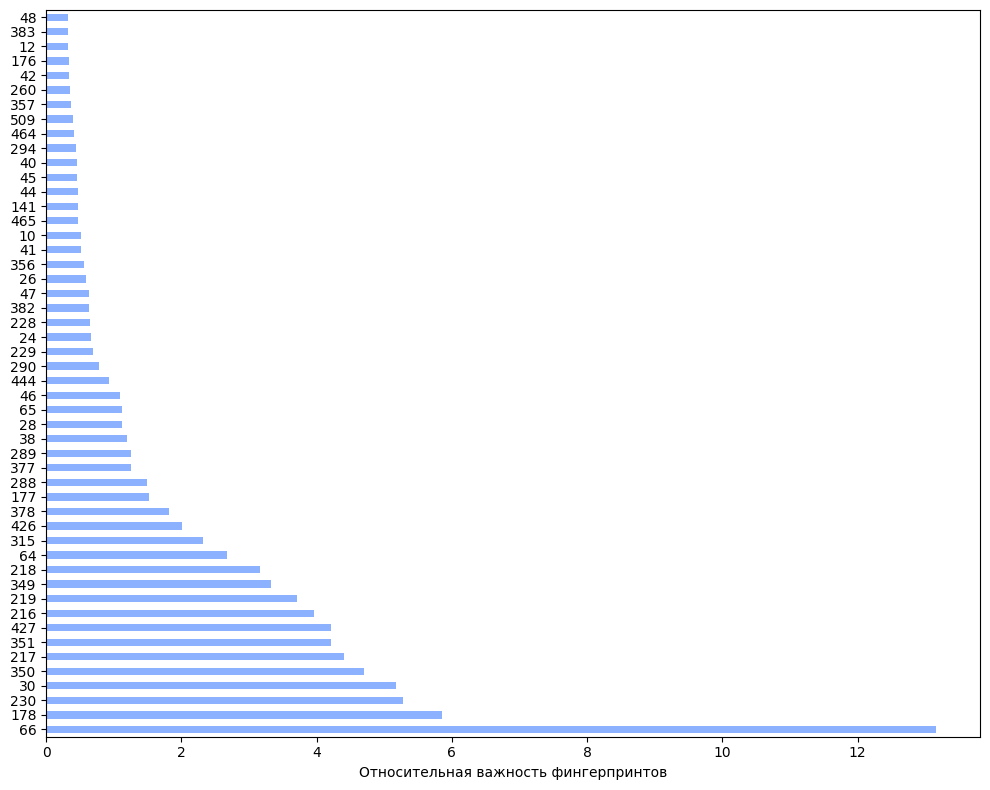

In [122]:
cb_ttf = CatBoostRegressor()
X = TTF.drop(["Ka_mean"], axis = 1)[:]
y = TTF["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_ttf.fit(X_train, y_train, verbose=0)

y_pred = cb_ttf.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_imp_ttf = pd.Series(cb_ttf.get_feature_importance(), index=X.columns)
feat_imp_ttf.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность фингерпринтов')
plt.tight_layout()

In [123]:
importance_df_ttf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_ttf
})

# Сортируем DataFrame по важности и берем топ-15 признаков
top_features_ttf = importance_df_ttf.sort_values(by='Importance', ascending=False).head(15)
top_ttf = list(top_features_ttf["Feature"])
top_features_ttf

,Feature,Importance
66,66,13.153049
178,178,5.856872
230,230,5.279668
30,30,5.171006
350,350,4.706163
217,217,4.404345
351,351,4.214590
427,427,4.207607
216,216,3.967208
219,219,3.705167


### Удаление часто повторяющихся признаков

In [124]:
TopTors_data = pd.concat([TTF[top_ttf], DF_norm], axis = 1)
TopTors_data.head(3)

,66,178,230,30,350,217,351,427,216,219,...,PEOE_VSA9,VSA_EState9,SlogP_VSA2,FpDensityMorgan2,FpDensityMorgan3,PEOE_VSA6,MinEStateIndex,VSA_EState5,Chi0v,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.111125,0.383244,0.095394,0.096990,0.243292,0.332359,0.904940,0.062805,0.189597,0.000510
1,0,0,0,1,0,0,0,0,0,0,...,1.000000,0.784061,1.000000,0.070652,0.123547,0.000000,0.955733,0.542489,0.307724,0.441176
2,0,0,0,0,0,0,0,0,0,0,...,0.111125,0.383244,0.095394,1.000000,0.968605,0.000000,0.918240,0.546644,0.020002,0.006274


In [125]:
for col in TopTors_data.columns:
       print(f'Уникальные значения для {col}:\n{TopTors_data[col].value_counts()}\n')

Уникальные значения для 66:
66
0    31
1     2
Name: count, dtype: int64

Уникальные значения для 178:
178
0    27
1     6
Name: count, dtype: int64

Уникальные значения для 230:
230
0    30
1     3
Name: count, dtype: int64

Уникальные значения для 30:
30
0    28
1     5
Name: count, dtype: int64

Уникальные значения для 350:
350
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 217:
217
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 351:
351
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 427:
427
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 216:
216
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 219:
219
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 349:
349
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 218:
218
0    32
1     1
Name: count, dtype: int64

Уникальные значения для 64:
64
0    29
1     4
Name: count, dtype: int64

Уникальные значени

In [126]:
analyze_repetition(TopTors_data)

[66, 178, 230, 30, 350, 217, 351, 427, 216, 219, 349, 218, 64, 315, 426]

### **Готовый датасет**

In [127]:
TTF_data = TopTors_data.drop(analyze_repetition(TopTors_data), axis = 1)
TTF_data.head(3)

,SMR_VSA4,PEOE_VSA9,VSA_EState9,SlogP_VSA2,FpDensityMorgan2,FpDensityMorgan3,PEOE_VSA6,MinEStateIndex,VSA_EState5,Chi0v,Ka_mean
0,0.0,0.111125,0.383244,0.095394,0.096990,0.243292,0.332359,0.904940,0.062805,0.189597,0.000510
1,0.5,1.000000,0.784061,1.000000,0.070652,0.123547,0.000000,0.955733,0.542489,0.307724,0.441176
2,0.5,0.111125,0.383244,0.095394,1.000000,0.968605,0.000000,0.918240,0.546644,0.020002,0.006274


Опять же повторение моргановских фингерпринтов

# Корреляционные матрицы для всех датасетов

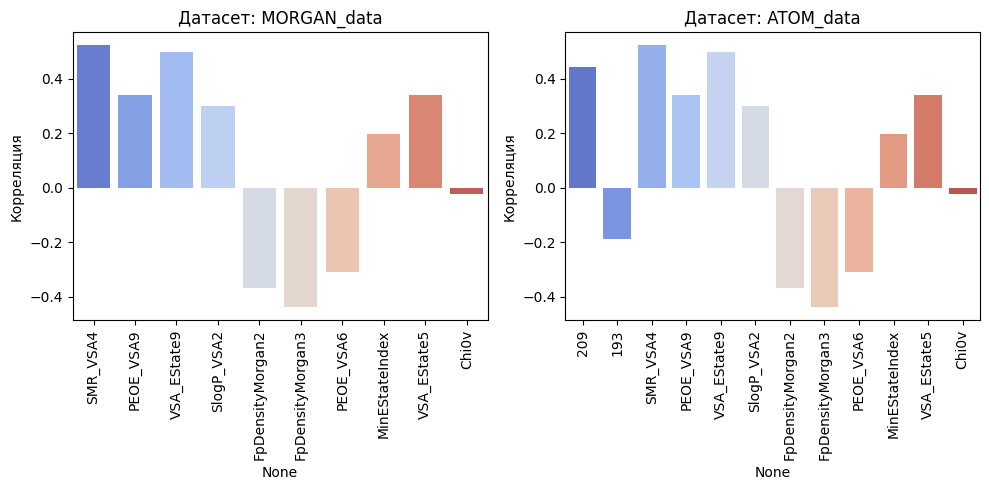

In [128]:
datasets = [
    ('MORGAN_data', MORGAN_data),
    ('ATOM_data', ATOM_data)
]

target_column = 'Ka_mean'

plt.figure(figsize=(10, 5))  # Устанавливаем размер фигуры (ширина, высота)

for i, (name, df) in enumerate(datasets):
    if target_column not in df.columns:
        print(f"Целевой столбец '{target_column}' отсутствует в {name}.")
        continue  # Пропустить этот датасет, если целевой столбец отсутствует

    # Вычисляем корреляцию
    correlation_matrix = df.corr()

    # Проверяем, есть ли целевой столбец в корреляционной матрице
    if target_column not in correlation_matrix.columns:
        print(f"Столбец '{target_column}' отсутствует в корреляции для {name}.")
        continue

    # Получаем корреляции с целевой переменной
    target_correlation = correlation_matrix[target_column]

    # Строим barplot только для признаков, отличных от целевого
    features = target_correlation.index[target_correlation.index != target_column]

    plt.subplot(1, len(datasets), i + 1)  # Создаем подграфик
    sns.barplot(x=features, y=target_correlation[features],  palette='coolwarm')
    plt.xticks(rotation=90)  # Поворачиваем метки по оси x для читаемости
    plt.title(f'Датасет: {name}')  # Заголовок с именем датасета
    plt.ylabel('Корреляция')  # Подпись оси y

plt.tight_layout()  # Уплотняем макет для предотвращения наложения
plt.show()  # Отображаем графики

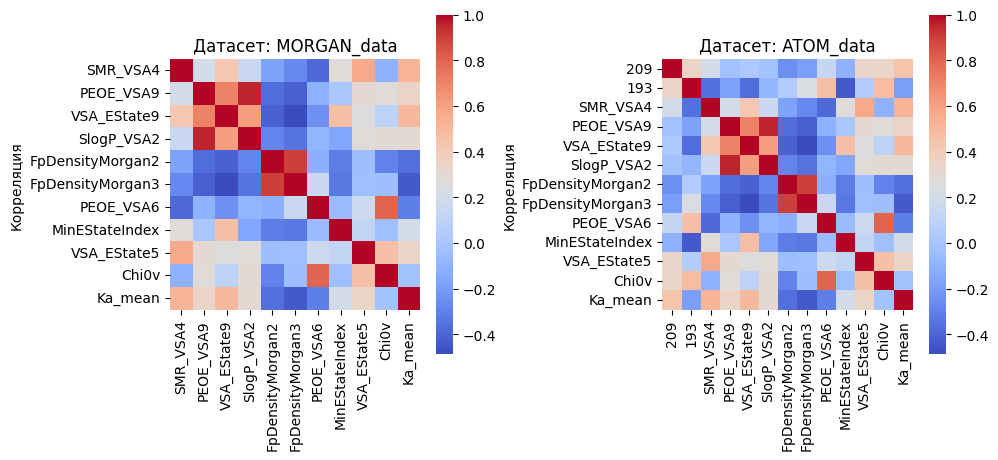

In [129]:
datasets = [
    ('MORGAN_data', MORGAN_data),
    ('ATOM_data', ATOM_data)
]

plt.figure(figsize=(10, 10))  # Устанавливаем размер фигуры

for i, (name, df) in enumerate(datasets):
    # Вычисляем корреляцию
    correlation_matrix = df.corr()

    # Создаем подграфик
    plt.subplot(2, 2, i + 1)

    # Визуализация всей корреляционной матрицы
    sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
    plt.title(f'Датасет: {name}')  # Заголовок с именем датасета
    plt.ylabel('Корреляция')  # Подпись оси y

plt.tight_layout()  # Подгоняем макет для лучшего отображения
plt.show()  # Показываем графики

Таким образом, самым коррелирующим с целевой метрикой в наборе данных WP6++ оказался также датасет ATOM_data